In [ ]:
import numpy as np
import matplotlib.pyplot as plt

You are a data scientist working for an e-commerce company.

The marketing team wants to understand the **relationship between the amount of money spent on online advertising and the revenue generated from those ads**.

They believe that higher advertising spending should correlate with higher revenue, but they want to quantify this relationship.

# **Problem**

Using the provided dataset, **perform a linear regression analysis to determine the relationship** between advertising spending (independent variable
𝑋, in thousands of dollars) and revenue generated (dependent variable
𝑌, in thousands of dollars).

**Calculate the Pearson correlation coefficient to assess the strength of this relationship.**


---



### Dataset
Here is the provided dataset:

In [ ]:
import pandas as pd
df = pd.read_csv('/content/advertising_revenue_data.csv')
df

,Advertising Spending (X),Revenue (Y)
0,1.5,7.0
1,2.0,8.0
2,2.5,8.5
3,3.0,9.0
4,3.5,9.5
5,4.0,10.0
6,4.5,11.0
7,5.0,11.5
8,5.5,12.0
9,6.0,12.5


From the dataset we know that:  
n = 10


---



### Arrays for X and Y
We now need to gather all the values of the variable x and the ones of y into separate arrays:

In [ ]:
# getting all the x values into a variable:

x_values = df['Advertising Spending (X)'].values

# getting all the y values into a variable:

y_values = df['Revenue (Y)'].values


### Computation of the PCC
Here is the Pearson r Correlation Coefficient formula:   

$$
r = \frac{n(\sum XY) - (\sum X)(\sum Y)}{\sqrt{[n\sum X^2 - (\sum X)^2][n\sum Y^2 - (\sum Y)^2]}}
$$

Let's calculate it using numpy!

In [ ]:
import numpy as np

def pearson_correlation_coefficient(x, y):
    """
    Calculates the Pearson correlation coefficient between two arrays using the formula:
    r = [n(∑XY) - (∑X)(∑Y)] / √{[n∑X^2 - (∑X)^2][n∑Y^2 - (∑Y)^2]}.

    Args:
        x: The first array.
        y: The second array.

    Returns:
        The Pearson correlation coefficient.
    """

    n = len(x)

    # Calculate the sums and sums of squares
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x ** 2)
    sum_y_squared = np.sum(y ** 2)

    # Calculate the numerator and denominator of the formula
    numerator = n * sum_xy - sum_x * sum_y
    denominator = np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))

    # Return the Pearson correlation coefficient
    return numerator / denominator

pcc = pearson_correlation_coefficient(x_values, y_values)
print(round(pcc, 3))


0.997


$$
r = 0.997
$$

The result of the Pearson r correlation coefficient is almost equal to 1. This indicates **a very strong relation between the variable x and y.**

## Conclusion

The Pearson correlation coefficient and the linear regression analysis both indicate a **strong positive relationship** between **advertising spending and revenue**.

This suggests that, **as advertising spending increases, revenue tends to increase as well.**

### Recommendations: 

#### a. Refine Data on Ads Budget Sizes and their respective impact on Revenue
To gain deeper insights, I recommend that **the Marketing team collaborates with the Data team** to refine the analysis by **examining different budget sizes (or spending amounts)** (e.g., < 500$, < 1K$, < 3K$, < 10K$) and their respective impact on sales. This would provide a **more nuanced understanding** of how various budget size influence revenue. We may identify a **limit threshold** upon which the return on investment is not worth the speding amount. 

#### b. Time-based Analysis
Additionally, I suggest incorporating **a time-based analysis to identify seasonal patterns** in the relationship between budget sizes and their impact on revenue. Understanding these patterns could **help tailor the marketing strategy** to leverage key periods more effectively, optimizing promotional efforts based on new, time-sensitive insights.  

#### c. Segment Analysis by Product Categories
Conduct a **segmented analysis to determine if the relationship varies by product category**. This could help the Marketing team create more tailored strategies, where efficient budgets are allocated on corresponding categories for the most significant revenues.

#### d. Integrate Other Data Sources: 
Combine this analysis **with other relevant data sources**, such as pricing, promotions, or product availability, to **understand the broader context**. This multi-variable analysis can **help pinpoint additional factors** influencing sales and optimize the overall strategy accordingly.


---



### Visualization
Let's visualize it:

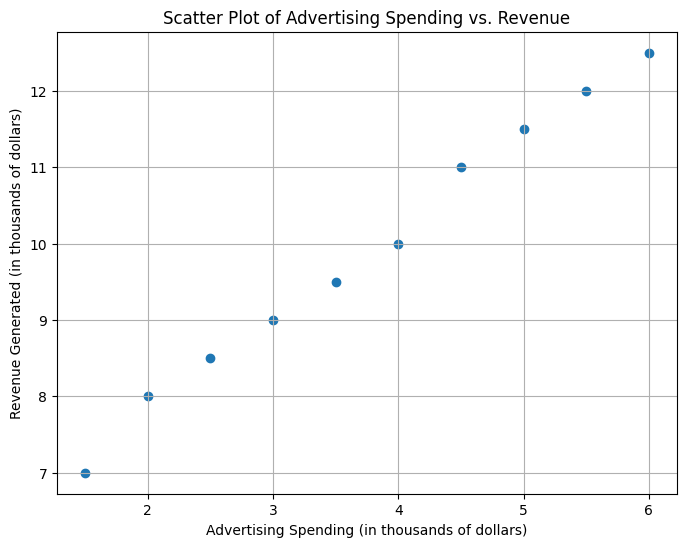

In [ ]:
# Assuming your dataset is in a pandas DataFrame called 'df'
# with columns 'advertising_spending' and 'revenue'

plt.figure(figsize=(8, 6))
plt.scatter(df['Advertising Spending (X)'], df['Revenue (Y)'])
plt.xlabel('Advertising Spending (in thousands of dollars)')
plt.ylabel('Revenue Generated (in thousands of dollars)')
plt.title('Scatter Plot of Advertising Spending vs. Revenue')
plt.grid(True)
plt.show()

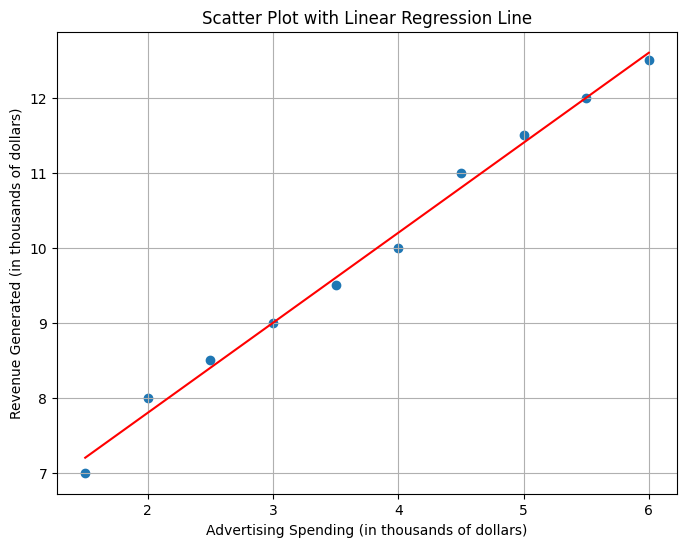

In [ ]:
from scipy import stats

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(x_values, y_values)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Advertising Spending (in thousands of dollars)')
plt.ylabel('Revenue Generated (in thousands of dollars)')
plt.title('Scatter Plot with Linear Regression Line')
plt.grid(True)
plt.show()